 # Proyecto 1: SVM Multiclase
 ----
  
  Universidad : UTEC \
  Curso       : Inteligencia Artificial \
  Profesor    : Cristian López Del Alamo \
  Tema        : Soft SVM Multiclass
  

 ----

 Nombres y  Apellidos de Integrantes (Añada porcentaje de participación de cada miembro del equipo):
 - Integrante 1: Leonardo Isidro. (100%)
 - Integrante 2: Luis Torres.     (100%)
 - Integrante 3: Pedro Mori.      (100%)
 - Integrante 3: Christian Salazar (100%)

# Librerias

In [2]:
import numpy as np
import pandas as pd
from  skimage.io import imread, imshow
from pathlib import Path
import pywt
import pywt.data
from PIL import Image
import os
import matplotlib.pyplot as plt

In [3]:
def Get_Feature(picture, cortes):
  LL = picture
  for i in range(cortes):
     LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
  return LL.flatten().tolist()

##

In [13]:

path = "C:/Users/david/UTEC/Cursos_UTEC/Machine_Learning/Proyectos_github/Proyecto_1-MachineLearning/imagenes_1/"
vectores_caracteristicos=[]
labels = []
entries = Path(path)
counter = 0
for entry in entries.iterdir():
  imagen = path + entry.name
  picture = imread(imagen)
  vectores_caracteristicos.append(Get_Feacture(picture,2))
  label = int(entry.name[0:3])
  labels.append(label)



In [14]:
data_X = np.array(vectores_caracteristicos)
data_y = np.array(labels)
print("Cantidad de imagenes: ", len(data_X))
print("Cantidad de etiquetas: ", len(data_y))
print(labels)

Cantidad de imagenes:  832
Cantidad de etiquetas:  832
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

## Partición del Dataset en Entrenamiento, Validación y Testing

In [15]:
from sklearn.model_selection import train_test_split

# Division del dataset en 70% entrenamiento, 15% validación y 15% prueba
X_train, X_temp, y_train, y_temp = train_test_split(data_X, data_y, test_size=0.3, random_state=42)
# Dvidimos el X_temp en 50% validación y 50% prueba para que queden 70% entrenamiento, 15% validación y 15% prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# **Soft SVM**

- Implementar todas las funciones para que este código sea funcional

In [ ]:
def loss(y, x, w, bias, c):
  # write your code here
  hinge_loss = c * np.sum(np.maximum(0, 1 - y * (np.dot(x, w) + bias)))
  regularization_term = np.dot(w, w)/2
  return hinge_loss + regularization_term

In [43]:
def loss(y, x, w, bias, c):
    num_samples = len(y)
    hinge_loss = 0
    regularization_term = np.dot(w, w.T) / 2  # Regularización L2
    num_classes = w.shape[0]
    for i in range(num_samples):
        scores = np.dot(x[i], w) + bias
        correct_class_score = scores[y[i]-1]

        for j in range(num_classes):
            if j == y[i]:
                continue
            margin = scores[j-1] - correct_class_score + 1  # +1 para la pérdida de margen
            if margin > 0:
                hinge_loss += margin

    hinge_loss /= num_samples
    loss_value = c * hinge_loss + regularization_term
    return loss_value


In [ ]:
def grad(y, x, w, bias, c):
  grad=[]
  # write your code here
  if(y*(np.dot(x,w)+bias)>=1):
    grad.append(w)
    grad.append(0)
  else:
    grad.append(w - c*x*y)
    grad.append(-c*y)
  return grad

In [20]:
def grad(y, x, w, bias, c):
    num_samples = len(y)
    grad_w = np.zeros_like(w)
    grad_b = 0

    for i in range(num_samples):
        scores = np.dot(x[i], w) + bias
        correct_class_score = scores[y[i]]

        for j in range(len(scores)):
            if j == y[i]:
                continue
            margin = scores[j] - correct_class_score + 1  # +1 para la pérdida de margen
            if margin > 0:
                grad_w += c * x[i]
                grad_b += c

    grad_w /= num_samples
    grad_b /= num_samples
    return grad_w, grad_b

In [ ]:
def update(w, b, grad, alpha):
    w -= alpha * grad[0]
    b -= alpha * grad[1]
    return w, b

In [21]:
def update(w, b, grad_w, grad_b, alpha):
    w -= alpha * grad_w
    b -= alpha * grad_b
    return w, b

# Entrenamiento

In [41]:
def train(X, y, num_epochs, num_classes, c=1.0, alpha=0.001):
    num_samples, num_features = X.shape
    w = np.random.rand(num_features, num_classes)
    b = np.random.random(num_classes)

    loss_function = []
    step = num_epochs // 10

    for epoch in range(num_epochs):
        loss_value = loss(y, X, w, b, c)
        loss_function.append(loss_value)

        if epoch % step == 0:
            print(f'Epoch {epoch}, loss {loss_value}')

        grad_w, grad_b = grad(y, X, w, b, c)
        w, b = update(w, b, grad_w, grad_b, alpha)

    plt.plot(range(num_epochs), loss_function, label='Función de pérdida')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.show()

    return w, b

# Funciones par graficar

In [ ]:
def plane_intersect(a, b):
    a_vec, b_vec = np.array(a[:3]), np.array(b[:3])
    aXb_vec = np.cross(a_vec, b_vec)
    A = np.array([a_vec, b_vec, aXb_vec])
    d = np.array([-a[3], -b[3], 0.]).reshape(3,1)
    p_inter = np.linalg.solve(A, d).T
    return p_inter[0], (p_inter + aXb_vec)[0]

In [ ]:
def h(x,w,b):
  return np.dot(x,w)+b

In [ ]:
def test(x,w,b,y):
  v = np.dot(x,w) + b
  m = []
  for i in v:
    if(i>0):
      m.append(1)
    else:
      m.append(-1)
  print("Numero de aciertos: ", np.sum(m == y))
  print("Numero de errores: ", np.sum(m != y))

In [ ]:
import matplotlib.cm as cm
w,b = train(iris_train_x,iris_train_y,7000)
iris_y_ = h(iris_test_x, w, b)
iris_y_pred = np.sign(iris_y_)

x_1, x_2 = plane_intersect(list(w)+[0,b], [0,0,1,0])
m = (x_2[1]-x_1[1])/(x_2[0]-x_1[0])
c = -m*x_1[0] + x_1[1]

d = 1/np.linalg.norm(w)
c_p = -m*(x_1[0] + d*math.sqrt(1/(1+m**2))) + x_1[1] + m*d*math.sqrt(1/(1+m**2))

plt.plot(range(4,8), [m*x_i + c for x_i in range(4,8)])
plt.plot(range(4,8), [m*x_i + c - c_p for x_i in range(4,8)], '--')
plt.plot(range(4,8), [m*x_i + c + c_p for x_i in range(4,8)], '--')
plt.scatter(iris_test_x[:,0], iris_test_x[:,1], color=cm.rainbow(iris_y_pred + 1))

test(iris_test_x,w,b,iris_test_y)


Época 1/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 2/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 3/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 4/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 5/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 6/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 7/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 8/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 9/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 10/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 11/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 12/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 13/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
Época 14/100, Precisión Entrenamiento: 1.0, Precisión Validación: 0.408
É

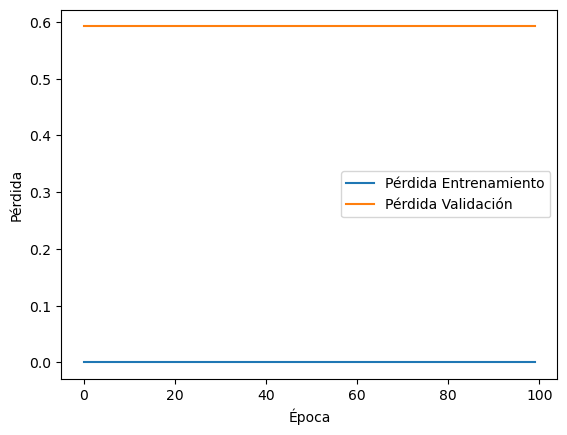

In [45]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Crear un clasificador SVM multiclase
clf = svm.SVC(kernel='linear', C=1.0, decision_function_shape='ovr')  # 'ovr' para clasificación uno contra todos

# Inicializar listas para almacenar la pérdida en entrenamiento y validación
loss_train = []
loss_val = []

# Definir el número de épocas (iteraciones)
num_epochs = 100

for epoch in range(num_epochs):
    # Entrenar el modelo utilizando el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)

    # Calcular la precisión del modelo en entrenamiento y validación
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)

    # Calcular y almacenar la pérdida en entrenamiento y validación (puedes usar cualquier función de pérdida que desees)
    loss_train.append(1 - accuracy_train)
    loss_val.append(1 - accuracy_val)

    print(f'Época {epoch + 1}/{num_epochs}, Precisión Entrenamiento: {accuracy_train}, Precisión Validación: {accuracy_val}')

# Graficar las curvas de pérdida
plt.plot(range(num_epochs), loss_train, label='Pérdida Entrenamiento')
plt.plot(range(num_epochs), loss_val, label='Pérdida Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [42]:
num_epochs = 1000  # Número de épocas (ajusta según sea necesario)
num_classes = len(np.unique(y_train))  # Número de clases en el conjunto de datos
# X_train = np.array(X_train)
# y_train = np.array(y_train)
# X_test = np.array(X_test)
# y_test = np.array(y_test)
# print(num_classes)
# # Entrenar el modelo
trained_w, trained_b = train(X_train, y_train, num_epochs, num_classes)

# # Realizar predicciones en el conjunto de prueba
scores = np.dot(X_test, trained_w) + trained_b
predicted_labels = np.argmax(scores, axis=1)

# # Calcular la precisión
accuracy = np.mean(predicted_labels == y_test)
print("Accuracy:", accuracy)

IndexError: index 10 is out of bounds for axis 0 with size 10